# ※ naver Open Api를 사용하여 네이버지식인에서 "전주 여행" 과 "경주 여행" 을 검색 -> 명사만 추출(re) -> 빈도분석(DataFrame), 시각화(워드클라우드)

# 1. 네이버 api를 활용하여 두 검색어 추출

In [56]:
import requests
import pandas as pd
import json
from requests import get
from bs4 import BeautifulSoup
from konlpy.tag import Kkma
import nltk
from nltk.tokenize import RegexpTokenizer 
from PIL import Image
import numpy as np

In [70]:
client_id = "VZFooCV5DlzZFqro7AN8"
client_secret = "n42UfN9IIf"
keywords = ["전주 여행", "경주 여행"]
pages = 10

In [71]:
def get_kin_results(keyword, pages):
    items_list = []
    for page in range(1, pages + 1):
        url = f'https://kin.naver.com/search/list.naver?query={keyword}&page={page}'
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        items = soup.select('ul.basic1 > li dt > a')
        for item in items:
            items_list.append(item.text)
    return items_list

In [72]:
def get_kin_results(keyword, pages):
    items_list = []
    for page in range(1, pages + 1):
        url = f'https://kin.naver.com/search/list.naver?query={keyword}&page={page}'
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        items = soup.select('ul.basic1 > li dt > a')
        for item in items:
            items_list.append(item.text)
    return items_list

In [73]:
def kkma_noun(text_list):
    kkma = Kkma
    nouns = []
    for text in text_list:
        nouns += okt.nouns(text)
    return Counter(nouns)

In [74]:
def create_wordcloud(frequencies, title):
    wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf', 
                           background_color='white', 
                           width=800, 
                           height=400).generate_from_frequencies(frequencies)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

In [104]:
text_data = frequencies
texts_ = ' '.join(text_data)
ret = RegexpTokenizer('[\w]{3,}')
words = ret.tokenize(texts_)

In [105]:
불용어 = set(['전주', '여행', '경주', '여행'])

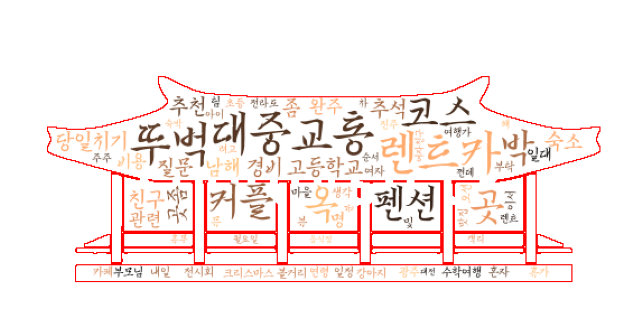

In [106]:
img = Image.open('data/korea-house-black-fill.png')
mask = np.array(img)
mask = np.where(mask > 200, 255, 0).astype(np.uint8)
# plt.imshow(mask)
wordcloud = WordCloud(
    background_color = 'white',
    max_words=400,
    font_path='이순신Regular.ttf',
    relative_scaling=0.2,
    colormap='copper',
    mask=mask,
    contour_color='red',
    contour_width=1,
    stopwords=불용어
)
wordcloud.generate(texts_)
plt.figure(figsize=(10,4))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [82]:
from requests import get
import time
import os
import json
from html import unescape
import pandas as pd

In [83]:
# 네이버 API 계정 정보
client_id = "VZFooCV5DlzZFqro7AN8"
client_secret = "n42UfN9IIf"
queries = ['전주 여행', '경주 여행']
max_start = 5

In [97]:
query = '전주 여행'
start = 0
header = {'X-Naver-Client-Id':client_id,
         'X-Naver-Client-Secret':client_secret}
url= f'https://openapi.naver.com/v1/search/kin.json?query={query}&display=100&start={start+1}'
response = get(url, headers=headers)
print(response.text)

{
	"lastBuildDate":"Mon, 30 Dec 2024 17:40:09 +0900",
	"total":47106,
	"start":1,
	"display":100,
	"items":[
		{
			"title":"<b>전주여행<\/b> 대중교통이랑 렌트카중 어떤게 좋을까요?",
			"link":"https:\/\/kin.naver.com\/qna\/detail.naver?d1id=9&dirId=90110&docId=477694429&qb=7KCE7KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=1&search_sort=0&spq=0",
			"description":"... <b>전주여행<\/b>때 움직이기 차가 편할지 대중교통이 편할지 알려주세요. 교통 상황이 어떤지 궁금합니다. <b>전주여행<\/b> 전주맛집 국내여행 전주달봉이 달봉티비 <b>전주여행<\/b>코스 전주가볼만한곳 여수여행 여수가볼만한곳 제주도여행... "
		},
		{
			"title":"<b>전주여행<\/b>갈려고하는데요!",
			"link":"https:\/\/kin.naver.com\/qna\/detail.naver?d1id=9&dirId=90110&docId=472294467&qb=7KCE7KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=2&search_sort=0&spq=0",
			"description":"<b>전주여행<\/b>을 갈려고하는데요!아는사람과 갈려고하는데 호텔은 좋은가격에 정했고~ 음..2박3일여행인데 얼마정도갖고가면좋을까요?그리고 맛집같은거 카페같은거 추천해주세요! <b>전주여행<\/b>을 갈려고하는데요!아는사람과 갈려고하는데... "
		},
		{
			"title":"<b>전주 여행<\/b>",
			"link":"https:\/\/kin.naver.com\/qna\/detail.naver?d1id=9&dirId=90110&docId=472340028&qb=7KCE7KO8IO

In [98]:
# 데이터를 저장할 파일 생성 (naver_kin.txt)
file_name = 'data/naver_kin.txt'
with open(file_name, 'w', encoding='utf-8') as file:
    file.write('{}\t{}\t{}\t{}\t{}\t{}\n'.format('query', 'no', 'title', 'link', 'description', 'total_text'))

In [100]:
elements = json.loads(response.text)['items']
elements[0]

{'title': '<b>전주여행</b> 대중교통이랑 렌트카중 어떤게 좋을까요?',
 'link': 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=90110&docId=477694429&qb=7KCE7KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=1&search_sort=0&spq=0',
 'description': '... <b>전주여행</b>때 움직이기 차가 편할지 대중교통이 편할지 알려주세요. 교통 상황이 어떤지 궁금합니다. <b>전주여행</b> 전주맛집 국내여행 전주달봉이 달봉티비 <b>전주여행</b>코스 전주가볼만한곳 여수여행 여수가볼만한곳 제주도여행... '}

In [108]:
for i, element in enumerate(elements):
    title = element['title'].replace('<b>', ' ').replace('</b>', ' ')
    link = element['link']
    description = element['description'].replace('<b>', ' ').replace('</b>', ' ')
    description = unescape(description) # html 특수문자 처리(&lt; -> < 로 대체)
#     print(query, (start*100+i+1), title, link, description, title+' '+description)
    with open(file_name, 'a', encoding='utf-8') as file:
        file.write('{}\t{}\t{}\t{}\t{}\t{}\n'.format(query,
                                                     start*100+i+1,
                                                     title,
                                                     link,
                                                     description,
                                                     title + ' ' + description))

In [109]:
df = pd.read_csv('data/naver_kin.txt', sep='\t')
df.head(2)

,query,no,title,link,description,total_text
0,전주 여행,1,전주여행 대중교통이랑 렌트카중 어떤게 좋을까요?,https://kin.naver.com/qna/detail.naver?d1id=9&...,... 전주여행 때 움직이기 차가 편할지 대중교통이 편할지 알려주세요. 교통 상황...,전주여행 대중교통이랑 렌트카중 어떤게 좋을까요? ... 전주여행 때 움직이기 ...
1,전주 여행,2,전주여행 갈려고하는데요!,https://kin.naver.com/qna/detail.naver?d1id=9&...,전주여행 을 갈려고하는데요!아는사람과 갈려고하는데 호텔은 좋은가격에 정했고~ 음....,전주여행 갈려고하는데요! 전주여행 을 갈려고하는데요!아는사람과 갈려고하는데 호텔...


# 12월 31일(2024년 마지막날)

In [ ]:
def get_search_element_save(query, start):